In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Импорт библиотек для работы с датасетом

In [5]:
df = pd.read_csv('BostonHousing.csv')

df.shape

(506, 14)

Чтение датасета

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Описание датасета

In [7]:
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis     rad  tax  ptratio  b       lstat  medv
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900  1    296  15.3     396.90  4.98   24.0    1
0.00906   90.0  2.97   0     0.400  7.088  20.8   7.3073  1    285  15.3     394.72  7.85   32.2    1
0.01096   55.0  2.25   0     0.389  6.453  31.9   7.3073  1    300  15.3     394.72  8.23   22.0    1
0.01301   35.0  1.52   0     0.442  7.241  49.3   7.0379  1    284  15.5     394.74  5.49   32.7    1
0.01311   90.0  1.22   0     0.403  7.249  21.9   8.6966  5    226  17.9     395.93  4.81   35.4    1
                                                                                                   ..
45.74610  0.0   18.10  0     0.693  4.519  100.0  1.6582  24   666  20.2     88.27   36.98  7.0     1
51.13580  0.0   18.10  0     0.597  5.757  100.0  1.4130  24   666  20.2     2.60    10.11  15.0    1
67.92080  0.0   18.10  0     0.693  5.683  100.0  1.4254  24   666  20.2     384.97  22

Подсчет уникальных строк

In [10]:
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis     rad  tax  ptratio  b       lstat  medv
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900  1    296  15.3     396.90  4.98   24.0    1
0.00906   90.0  2.97   0     0.400  7.088  20.8   7.3073  1    285  15.3     394.72  7.85   32.2    1
0.01096   55.0  2.25   0     0.389  6.453  31.9   7.3073  1    300  15.3     394.72  8.23   22.0    1
0.01301   35.0  1.52   0     0.442  7.241  49.3   7.0379  1    284  15.5     394.74  5.49   32.7    1
0.01311   90.0  1.22   0     0.403  7.249  21.9   8.6966  5    226  17.9     395.93  4.81   35.4    1
                                                                                                   ..
45.74610  0.0   18.10  0     0.693  4.519  100.0  1.6582  24   666  20.2     88.27   36.98  7.0     1
51.13580  0.0   18.10  0     0.597  5.757  100.0  1.4130  24   666  20.2     2.60    10.11  15.0    1
67.92080  0.0   18.10  0     0.693  5.683  100.0  1.4254  24   666  20.2     384.97  22

Подсчет строк

In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Проверка есть ли нулевые значения

In [11]:
df.duplicated().sum()

np.int64(0)

Проверка на дубликаты

In [14]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f"{col}: выбросов {outliers.shape[0]}")

medv: выбросов 40


Количество выбросов через IQR

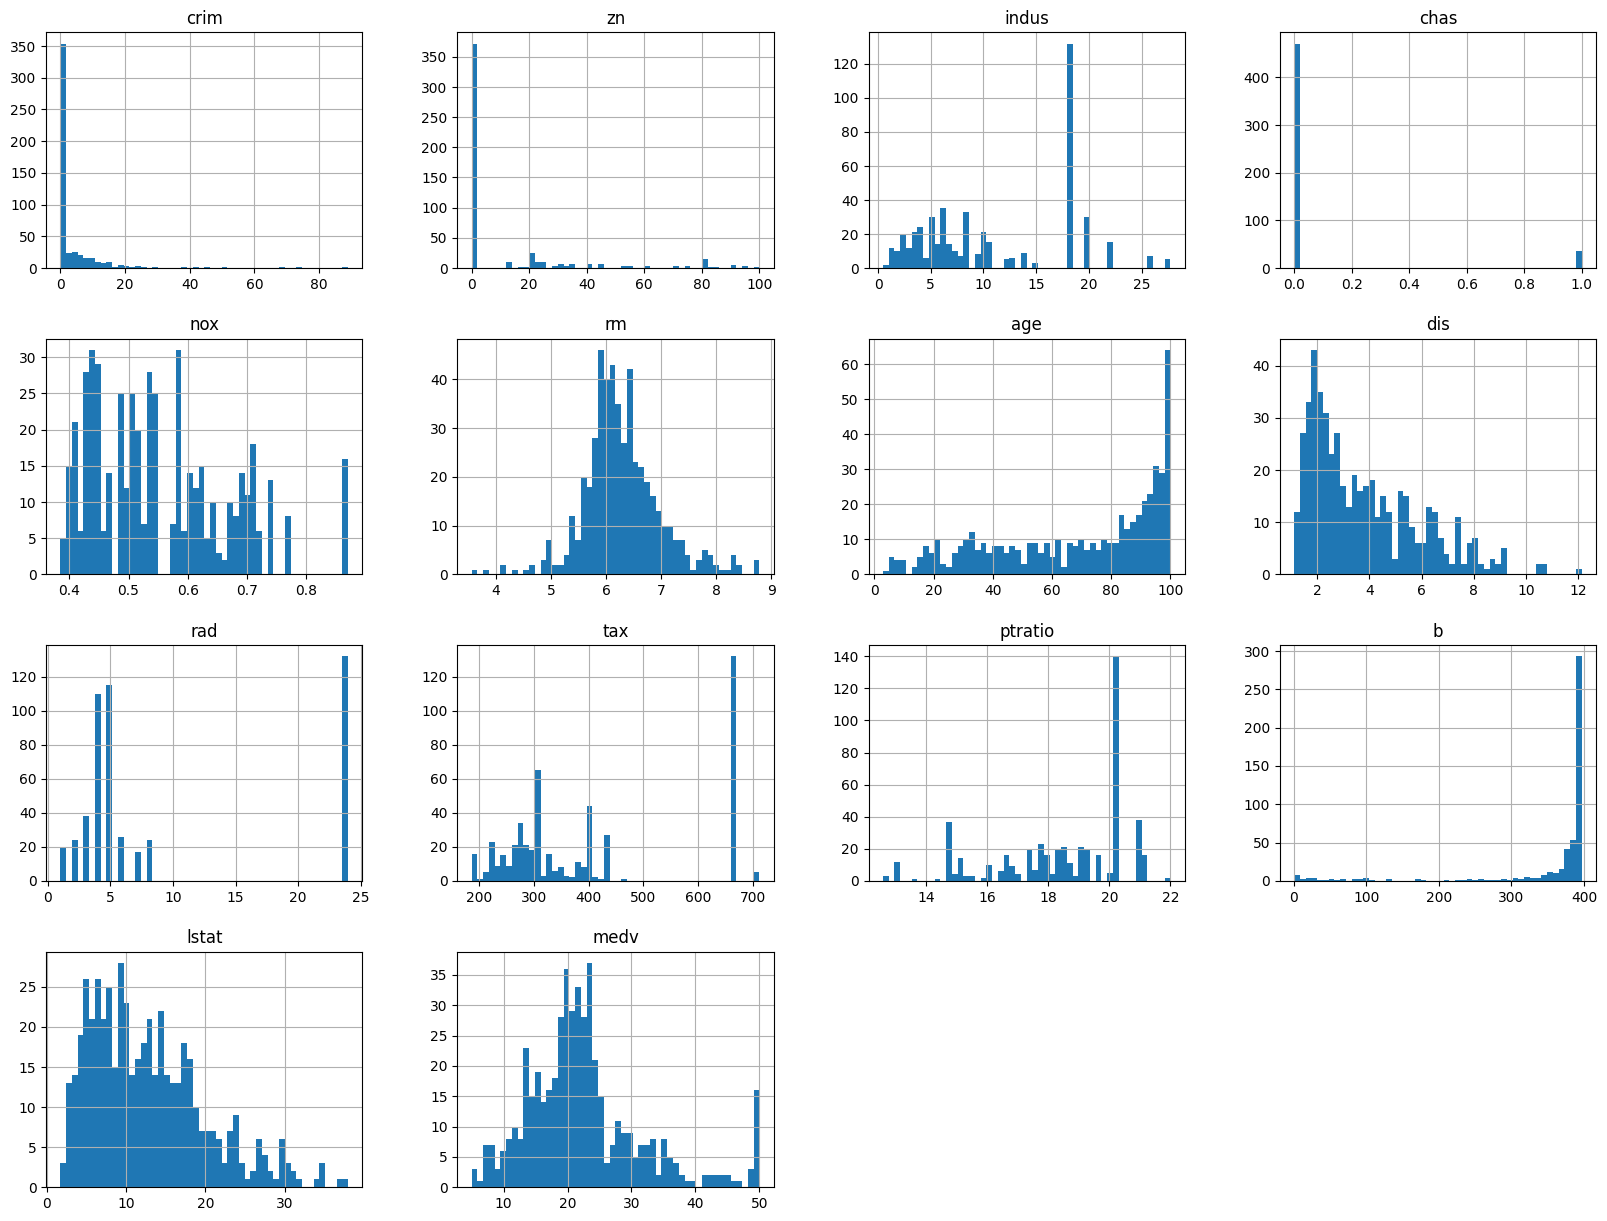

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()


Построение гистограмм для всех строк 

<Axes: >

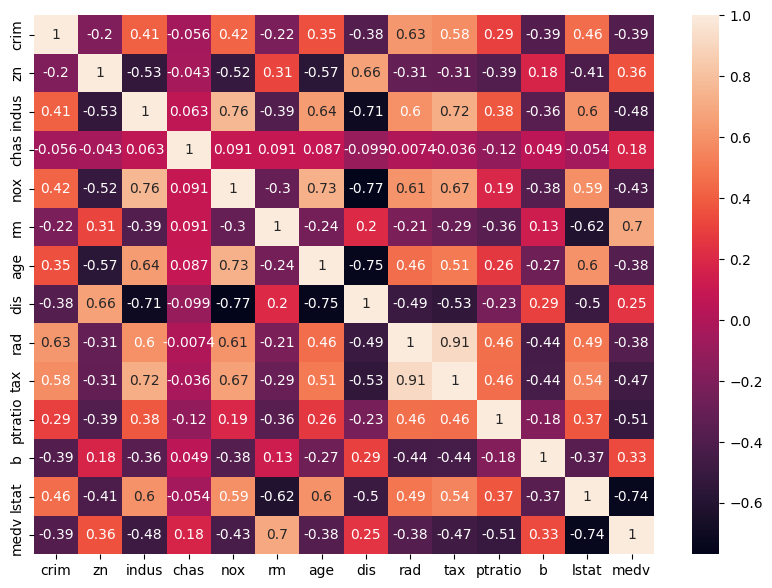

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)

Корреляционная матрица


Вопросы:

1. Средняя цена жилья

In [23]:
print("Средняя цена:", df["medv"].mean())

Средняя цена: 22.532806324110677


2. Максимальная и минимальная цена

In [24]:
print("Макс цена:", df["medv"].max(), "Мин цена:", df["medv"].min())

Макс цена: 50.0 Мин цена: 5.0


3. Связь налогов и цены

In [25]:
print(df[["tax","medv"]].corr())

           tax      medv
tax   1.000000 -0.468536
medv -0.468536  1.000000


Построение графиков

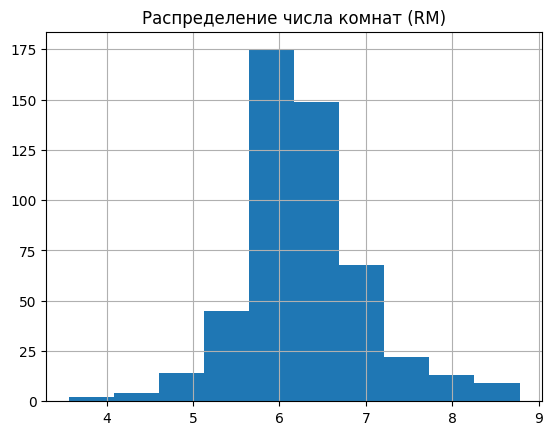

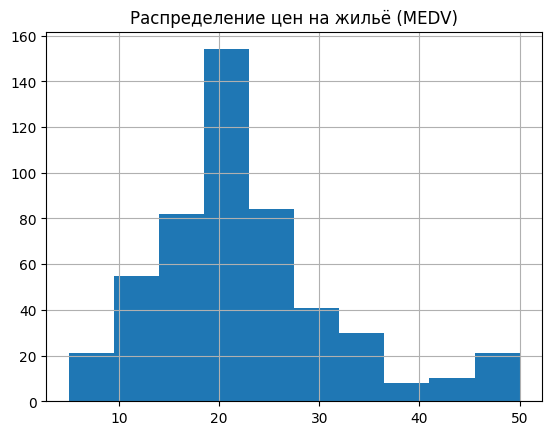

In [22]:
# Гистограммы (минимум 2)
df["rm"].hist()
plt.title("Распределение числа комнат (RM)")
plt.show()

df["medv"].hist()
plt.title("Распределение цен на жильё (MEDV)")
plt.show()

 Boxplot

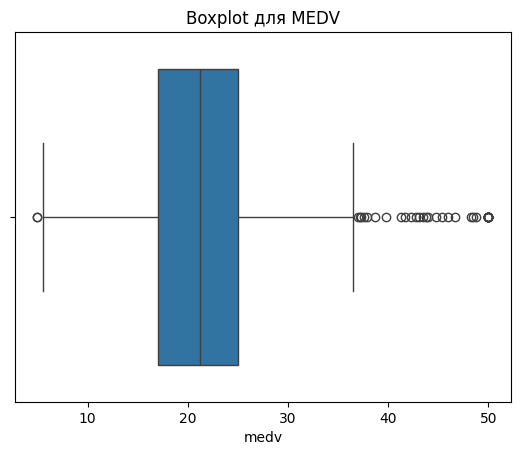

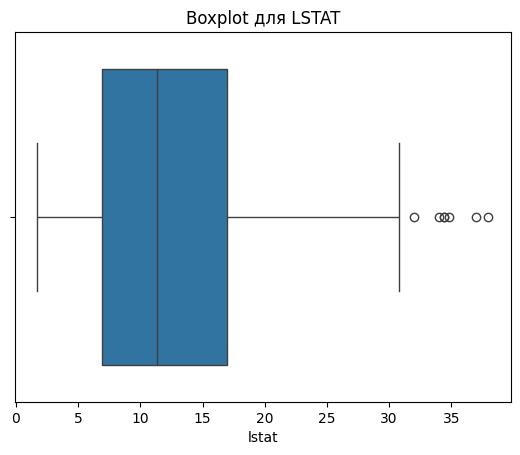

In [21]:
# Boxplot (минимум 2)
sns.boxplot(x=df["medv"])
plt.title("Boxplot для MEDV")
plt.show()

sns.boxplot(x=df["lstat"])
plt.title("Boxplot для LSTAT")
plt.show()

Bar plot

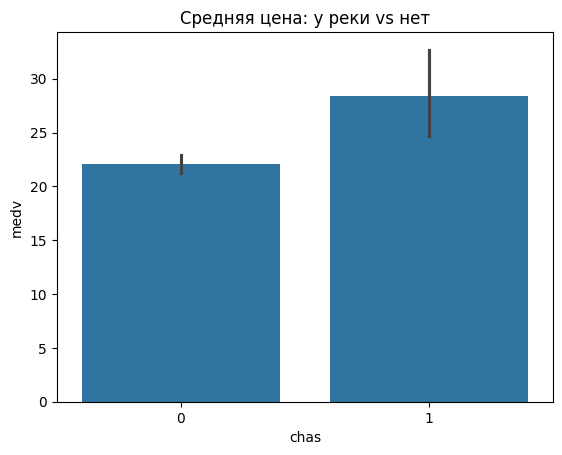

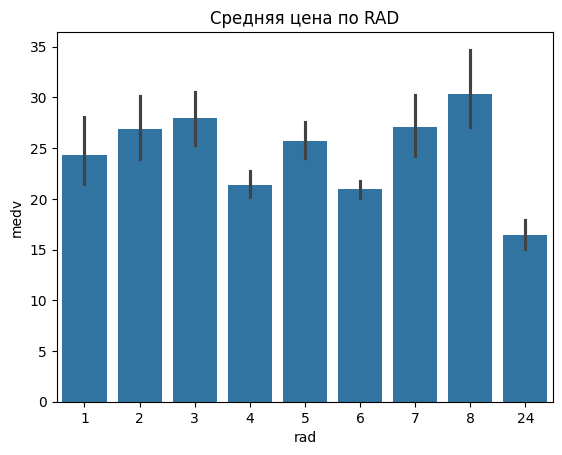

In [20]:
sns.barplot(x="chas", y="medv", data=df)
plt.title("Средняя цена: у реки vs нет")
plt.show()

sns.barplot(x="rad", y="medv", data=df)
plt.title("Средняя цена по RAD")
plt.show()


Scatter plot 

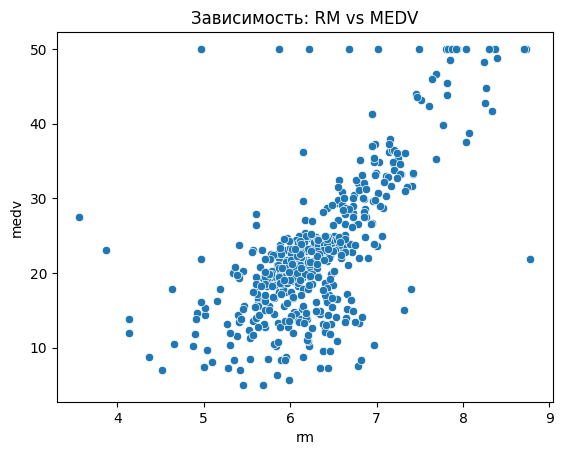

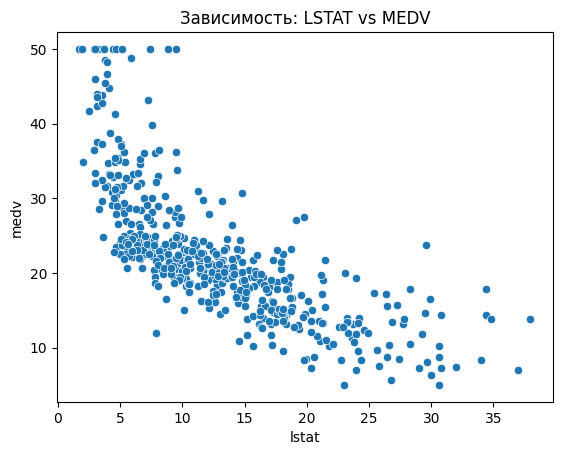

In [19]:
sns.scatterplot(x="rm", y="medv", data=df)
plt.title("Зависимость: RM vs MEDV")
plt.show()

sns.scatterplot(x="lstat", y="medv", data=df)
plt.title("Зависимость: LSTAT vs MEDV")
plt.show()

 Contingency table

In [18]:
# Contingency table (для категориальных)
print(pd.crosstab(df["chas"], df["rad"]))


rad   1   2   3    4    5   6   7   8    24
chas                                       
0     19  24  36  102  104  26  17  19  124
1      1   0   2    8   11   0   0   5    8
